In [61]:

import spacy
import pyforest ## all the machine learnign libreries!
import re
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.tokens import Token
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist
# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Ideas: split the dates into day/ Month/Year/  and do values/counts()
#len of the reviews and tittles and see the distrubution


## Load in the Dataset

In [2]:
df = pd.read_csv("reviews.csv")

<IPython.core.display.Javascript object>

In [3]:
# df.head(20)

In [4]:
df.isnull().sum()

Reviews    0
Date       0
Names      0
Tittles    0
dtype: int64

In [3]:
# remove duplicante
duplicates = df[df.Reviews.duplicated(keep = False)].sort_values(by='Reviews')
df.drop_duplicates(subset=['Reviews'],keep=False,inplace = True)

In [27]:
# df['Reviews'] = df.Reviews.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))
# df['Reviews']= df.Reviews.apply(lambda x:re.sub('[‘’“”…]', '', x))
# df['Reviews'] = df.Reviews.apply(lambda x: re.sub( r"[\s]+",' ', x))

In [4]:
df['Reviews'] = df['Reviews'].apply(lambda x: x.split())

In [5]:
# df['Reviews'] = df['Reviews'].apply(lambda x: x.replace(" ", "")) not usefull

In [5]:
df['Reviews'] = df['Reviews'].apply(lambda x: ' '.join(x))

In [9]:
# ## DONT WORK
# def clean_data_first_time(df_):
#     for col in df_.columns:
#         df[col] = df[col].apply(lambda x: re.sub(r'\s([?.!"](?:\s|$))', '', x))
#         df[col] = df[col].apply(lambda x: re.sub(' +', ' ', x))
#     return df_.head()

In [10]:
# clean_data_first_time(df)

,Reviews,Date,Names,Tittles
2,I have used Overdrive on my Android devices fo...,"December 6, 2019",Deborah England,\nStill Struggling\n
3,Too many romance novels in ‘literature ‘ selec...,"January 22, 2018",pianogal,\nthis is only reason i downloaded so sorta us...
4,I have tried to use this app but haven't figur...,"July 25, 2019",Dita C. Batteau,\nDifficult to Use\n
5,.i used to be able to drag books from here to ...,"March 30, 2018",d mede,\nVirtual Library with limitations\n
6,It does not seem to have the ability to order ...,"March 7, 2019",Amazon Customer,\nAnnoying steps\n


In [17]:
# df['Reviews'] = df['Reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))



In [6]:
def clean_data(df_):
    """Make lower case ,remove puntuation, remove new lines and remove additional punctuation"""
    for col in df_.columns:
        df[col]= df[col].apply(lambda x: re.sub(r"[\n\t\s]+",' ', x.lower()))
        df[col] = df[col].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))
        df[col]= df[col].apply(lambda x:re.sub('[‘’“”…]', '', x))
        df[col]= df[col].apply(lambda x: re.sub('\w*\d\w*', '', x))
        df[col] = df[col].apply(lambda x: re.sub('/(^| ).( |$)/', '', x))
    return df_.head()

        

In [7]:
clean_data(df)

,Reviews,Date,Names,Tittles
2,i have used overdrive on my android devices fo...,december,deborah england,still struggling
3,too many romance novels in literature selecti...,january,pianogal,this is only reason i downloaded so sorta use...
4,i have tried to use this app but haven t figur...,july,dita c batteau,difficult to use
5,i used to be able to drag books from here to ...,march,d mede,virtual library with limitations
6,it does not seem to have the ability to order ...,march,amazon customer,annoying steps


In [8]:
# removing words less than 3
df['Reviews'] = df['Reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))


## Tokenize , Remove Stop Words and Lemmatization

In [10]:
added_stopwords = ['thee', 'thing', 'thy', 'ye', 'thou', 'hath']
nlp.Defaults.stop_words |= {'thee', 'thing', 'thy', 'ye', 'thou', 'hath'}

In [11]:
def remove_stop(doc_tokens):
    """removes stop words and returns list of all nonstop words that is lemmatized"""
    return [token.lemma_ for token in doc_tokens if not token.is_stop]

In [12]:
df['Reviews_tokenize'] = df['Reviews'].apply(lambda x: remove_stop(nlp(x)))

In [38]:
df['Reviews_tokenize_join'] = df['Reviews_tokenize'].apply(lambda x: ' '.join(x))

In [14]:
# from collections import Counter
# df['Reviews_tokenize_count'] = df['Reviews_tokenize'].apply(lambda x:Counter(x))

In [44]:
# df['Reviews_tokenize_count']

In [45]:
def freq_words(x, terms = 20):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
   

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    return plt.show()

<IPython.core.display.Javascript object>

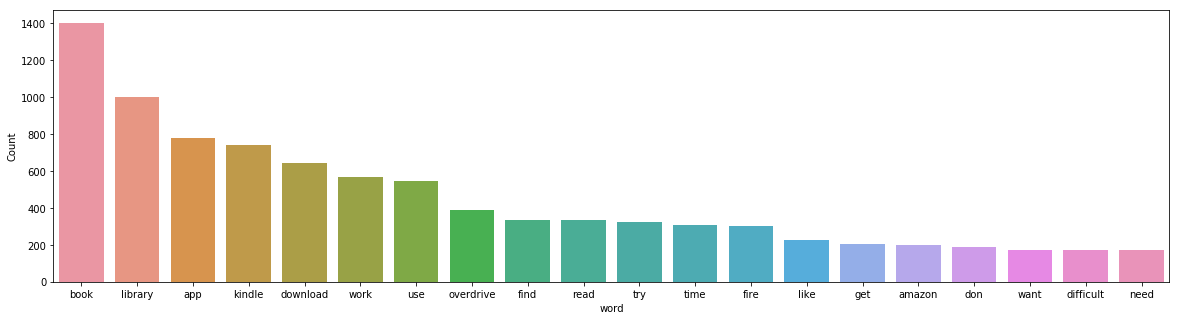

None


In [46]:
print(freq_words(df['Reviews_tokenize_join']))

In [49]:
import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS


In [58]:
def show_wordcloud(data, title = None): 
    wordcloud = WordCloud( collocations=False,
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=50,
        max_font_size=50, 
        scale=4,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

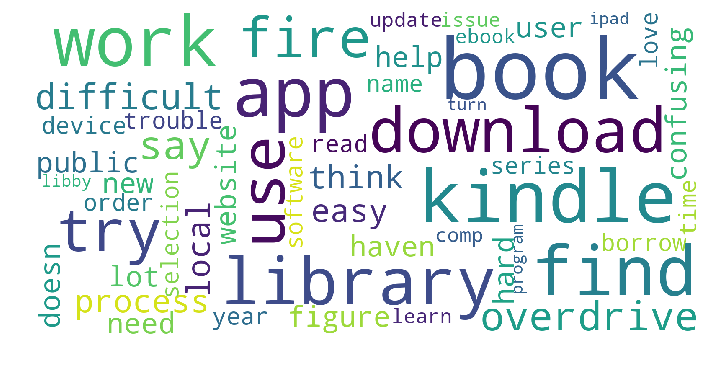

In [59]:
show_wordcloud(df['Reviews_tokenize_join'])

In [62]:
df['Reviews_tokenize_join'][55]

'get app pretty easy confusing download book figure go try library help download book kindle fire recommend app find didn understand confusing'

2        -1
3        -1
4        -1
5        -1
6        -1
7       175
8        60
9        25
10       98
11        4
14       -1
15       -1
16      122
17       -1
18       36
19       15
20       10
21       -1
22      100
23       -1
26       -1
27       22
28       -1
29       -1
30       -1
31       50
32       -1
33       -1
34       98
35       18
       ... 
2351     -1
2354     -1
2355     -1
2356      4
2357     49
2358     -1
2359     12
2360     19
2361     -1
2362     -1
2363     -1
2366     -1
2367     -1
2368     -1
2369     -1
2370     63
2371     -1
2372     41
2373     -1
2374     -1
2378     -1
2379     -1
2380     92
2381     -1
2382     -1
2383     -1
2384     -1
2385     -1
2386     32
2387     17
Name: Reviews_tokenize_join, Length: 1964, dtype: int64

In [55]:
df['Reviews_tokenize_join'][2357]

'have trouble choose book say bookshelf bookshelf kindle bopokshelf'